In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as iter
# import random as rand
sns.set()
import re
import sys

In [4]:
import os
os.system('cmd command')

0

In [5]:
# %ls
%cd 1_DShit
# %cd Github/
# %del Guitar-Scales-by-Lloyd-English.pdf/
# %cd ../

C:\Users\AMOS OSHIYOYE\cloned_Git\py\1_DShit


In [6]:
pres_df=pd.read_csv('president_heights_party.csv')

In [7]:
pres_df.describe()

,order,age,height
count,45.000000,45.000000,45.000000
mean,23.022222,55.000000,180.000000
std,13.136502,6.595453,6.977236
min,1.000000,42.000000,163.000000
25%,12.000000,51.000000,175.000000
50%,23.000000,55.000000,182.000000
75%,34.000000,58.000000,183.000000
max,45.000000,70.000000,193.000000


In [8]:
pres_df.columns

Index(['order', 'name', 'age', 'height', 'party'], dtype='object')

In [9]:
pres_df.head(4)

,order,name,age,height,party
0,1,George Washington,57,189,none
1,2,John Adams,61,170,federalist
2,3,Thomas Jefferson,57,189,democratic-republican
3,4,James Madison,57,163,democratic-republican


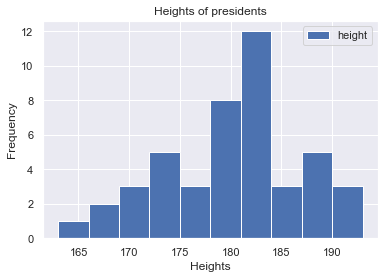

In [10]:
pres_df.plot(kind='hist',y='height', title='Heights of presidents')
plt.xlabel('Heights')
plt.show()

In [11]:
age_decade=10*(pres_df['age']//10)
age_decade=age_decade.astype(str)+'s'

In [12]:
age_decade.name='Decade'

In [13]:
age_col={}
for a,b in enumerate(age_decade.unique()):
    age_col[b]=a

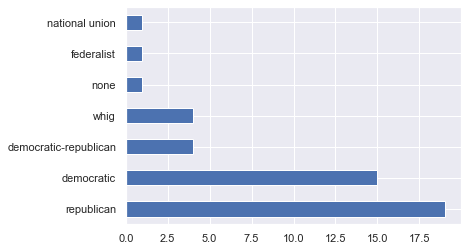

In [17]:
party_count=pres_df['party'].value_counts()
party_count.plot(kind='barh')
plt.show()

<AxesSubplot:title={'center':"Bar chart freq of Presidents' Height"}, ylabel='Frequency'>

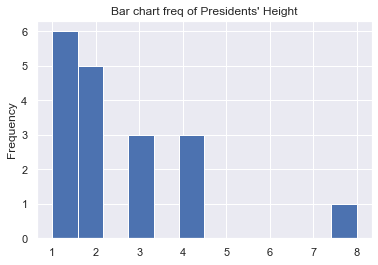

In [15]:
height_count=pres_df['height'].value_counts()
# height_count.plot(kind='bar')
height_count.plot(kind='hist',title='Bar chart freq of Presidents\' Height',bins=12)

In [16]:
col_by_age=[age_col[a] for a in age_decade]plot

SyntaxError: invalid syntax (635931771.py, line 1)

In [ ]:
categories=np.array(['r','g','b'])
pres_df.plot(kind='scatter',y='height',x='party', s= 12,c=col_by_age[categories])
plt.show()

In [18]:
pres_df.groupby('party').agg({'height':[np.mean,sum,np.median],'age':[np.mean,sum,np.median]})

height                     age             
                             mean   sum median       mean   sum median
party                                                                 
democratic             181.066667  2716  180.0  52.600000   789   52.0
democratic-republican  176.500000   706  177.0  57.250000   229   57.0
federalist             170.000000   170  170.0  61.000000    61   61.0
national union         178.000000   178  178.0  56.000000    56   56.0
none                   189.000000   189  189.0  57.000000    57   57.0
republican             180.894737  3437  182.0  55.263158  1050   54.0
whig                   176.000000   704  174.0  58.250000   233   57.5

In [19]:
pres_df.party.unique()

array(['none', 'federalist', 'democratic-republican', 'democratic',
       'whig', 'republican', 'national union'], dtype=object)

In [20]:
party_unique={}
for party_name,index in enumerate(pres_df['party'].unique()):
    party_unique[index]=party_name

In [22]:
colours_of_party=[party_unique[i] for i in pres_df['party']]

In [23]:
drop_index=pres_df[(pres_df['party']=='none')|(pres_df['party']=='federalist')|(pres_df['party']=='national union')].index

In [24]:
pres__df=pres_df.drop(drop_index)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
lR=LinearRegression()

In [ ]:
X=pres__df[['age']]
Y=pres__df['height']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
# train_test_split(pres_df, )?

In [ ]:
lR.fit(X_train,Y_train)

In [ ]:
lR.intercept_

In [ ]:
#predicting the height of a president if the age is 70
lR.predict([[70]])

In [ ]:
#Using SKlearn stadtviertel
# To predict the party of the president based on age and Height

In [ ]:
X1=pres__df[['age','height']]
Y1=pres__df['party']

In [ ]:
# ax=plt.subplot(111)
pres_scatter=plt.scatter( x='age',y='height',data=pres__df,c=colours_of_party)
# plt.xlim(pres_df['age'].min()-5,pres_df['age'].max()+5)
# plt.ylim(pres_df['height'].min()-5,200)
plt.legend(handles=pres_scatter.legend_elements()[0],labels=party_unique.keys(),bbox_to_anchor=(1.489,0.56),shadow=True,title='Party Unique'.upper())

In [ ]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=1, stratify=Y1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X1_train,Y1_train)

In [ ]:
pred=knn.predict(X1_test)

In [ ]:
Y1_pred_proba=knn.predict_proba(X1_test)

In [ ]:
knn.score(X1_test,Y1_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,Y1_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn_cv=cross_val_score(knn,X1,Y1,cv=3)
knn_cv.mean()

In [ ]:
pres_df.groupby(['party',age_decade])['age'].count().unstack().fillna(0)

In [ ]:
party_sel=pres_df['party']

In [ ]:
party_sel.name='Party'

In [ ]:
pres_df.groupby(['age',party_sel])['party'].count().unstack().fillna(0)

In [ ]:
pres_df[pres_df['age']==52]

In [ ]:
import random
random.randint(0,12)

In [ ]:
cant=pd.Series([0,1,2,3,4,5])

In [ ]:
cant.describe()

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),'data2':[2,5,3,7,6,1]},columns=['key','data1','data2'])

In [ ]:
df

In [ ]:
df.groupby('key').std()

In [ ]:
meth=[0,2,1,0,0,2]

In [ ]:
df.groupby(meth).sum()